# Date-a-scientist analysis

#### Explore the data

In [35]:
 # Import modules
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [36]:
data = pd.read_csv('profiles.csv')
print(len(data))

59946


In [37]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [38]:
print(data.dtypes)

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


In [39]:
print(sorted(data['age'].unique()))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 109, 110]


In [40]:
# Group ages
age_groups = [0,19, 29, 39, 49, 59, 69, 79, 89, 99, 200]
age_group_names = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>= 100']
data['age_range'] = pd.cut(
    data['age'], bins=age_groups, labels=age_group_names)    

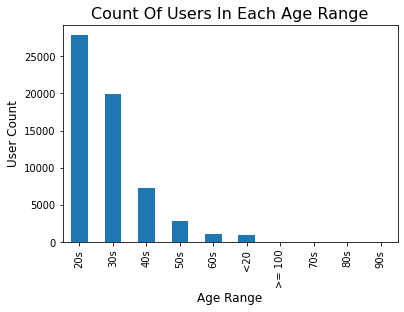

In [41]:
data['age_range'].value_counts().plot(kind='bar')
plt.title('Count Of Users In Each Age Range', fontsize = 16)
plt.xlabel('Age Range', fontsize = 12)
plt.ylabel('User Count', fontsize = 12)
plt.show()



In [42]:
#find distribution of gender

print(data['sex'].unique())

['m' 'f']


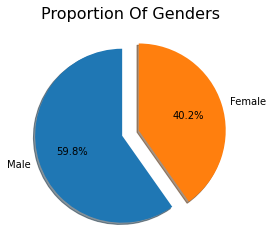

In [43]:
labels = ['Male', 'Female']

explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


plt.pie(data['sex'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Proportion Of Genders', fontsize = 16)
plt.show()


In [44]:
print(data['pets'].unique())
print(data['pets'].nunique())
data = data.dropna(subset = 'pets')


['likes dogs and likes cats' 'has cats' 'likes cats' nan
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']
15


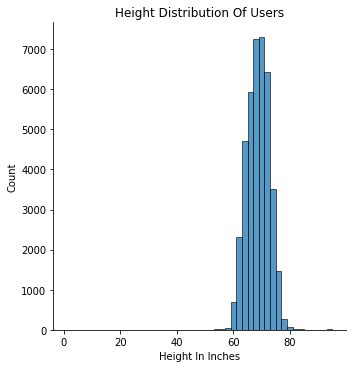

In [45]:
ax = sns.displot(data=data, x="height", kind="hist", binwidth = 2, legend  =False).set(title = 'Height Distribution Of Users');
ax.set_axis_labels(x_var = 'Height In Inches', y_var = 'Count')

<AxesSubplot:xlabel='count', ylabel='drinks'>

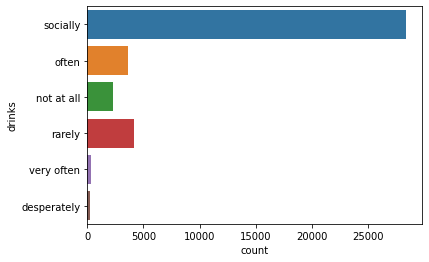

In [46]:
sns.countplot(data=data, y="drinks")

In [61]:
data['signsCleaned'] = data.sign.str.split().str.get(0)
cols = ['body_type', 'diet', 'orientation', 
       'sex', 'job', 'signsCleaned', 'education','pets']
df = data[cols].dropna()
df.shape

(19769, 8)

In [62]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,pets,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,likes dogs and likes cats,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,likes dogs and likes cats,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,likes cats,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,likes cats,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,likes dogs and likes cats,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [66]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

                                 precision    recall  f1-score   support

                  dislikes cats       0.00      0.00      0.00        40
                  dislikes dogs       0.00      0.00      0.00         9
dislikes dogs and dislikes cats       0.00      0.00      0.00        70
     dislikes dogs and has cats       0.00      0.00      0.00        32
   dislikes dogs and likes cats       0.00      0.00      0.00        92
                       has cats       0.00      0.00      0.00       420
                       has dogs       0.26      0.01      0.01      1329
     has dogs and dislikes cats       0.00      0.00      0.00       226
          has dogs and has cats       0.32      0.01      0.02       542
        has dogs and likes cats       0.00      0.00      0.00       960
                     likes cats       0.00      0.00      0.00       341
                     likes dogs       0.35      0.06      0.11      2492
   likes dogs and dislikes cats       0.50      0.

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [69]:
print(classification_report(Y_train, knn_predictions))

                                 precision    recall  f1-score   support

                  dislikes cats       0.28      0.28      0.28        40
                  dislikes dogs       0.00      0.00      0.00         9
dislikes dogs and dislikes cats       0.23      0.20      0.21        70
     dislikes dogs and has cats       0.24      0.16      0.19        32
   dislikes dogs and likes cats       0.24      0.24      0.24        92
                       has cats       0.25      0.26      0.26       420
                       has dogs       0.34      0.38      0.36      1329
     has dogs and dislikes cats       0.28      0.12      0.17       226
          has dogs and has cats       0.38      0.21      0.27       542
        has dogs and likes cats       0.38      0.23      0.29       960
                     likes cats       0.43      0.11      0.17       341
                     likes dogs       0.44      0.50      0.47      2492
   likes dogs and dislikes cats       0.41      0.

In [70]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [71]:
print(classification_report(Y_train, cart_predictions))

                                 precision    recall  f1-score   support

                  dislikes cats       0.68      0.95      0.79        40
                  dislikes dogs       0.80      0.89      0.84         9
dislikes dogs and dislikes cats       0.81      0.86      0.83        70
     dislikes dogs and has cats       0.86      0.97      0.91        32
   dislikes dogs and likes cats       0.69      0.86      0.77        92
                       has cats       0.76      0.94      0.84       420
                       has dogs       0.74      0.89      0.81      1329
     has dogs and dislikes cats       0.78      0.80      0.79       226
          has dogs and has cats       0.82      0.89      0.85       542
        has dogs and likes cats       0.81      0.84      0.83       960
                     likes cats       0.82      0.85      0.84       341
                     likes dogs       0.78      0.84      0.81      2492
   likes dogs and dislikes cats       0.87      0.

In [73]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

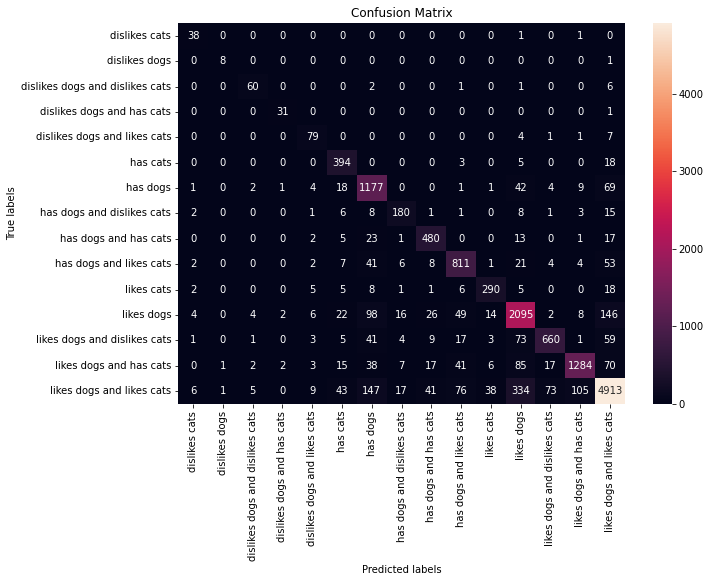

In [74]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);